<a href="https://colab.research.google.com/github/Muhammad-Afnan-Akram/Muhammad-Afnan-Akram/blob/main/cnn_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN step-by-step demo

This notebook demonstrates a single-channel CNN pipeline step-by-step: convolution (different strides and paddings), pooling, flatten, and a tiny fully-connected layer. Each step shows the matrix outputs so it's easy to follow.

**1. Kernel (Filter)**
A small matrix (e.g., 3×3) that slides over the input image to extract features like edges or textures.
Example: an edge-detection kernel highlights image boundaries.

**2. Stride**
The step size the kernel moves across the image.
Larger stride → smaller output feature map (less detail).

**3. Padding**
Adding extra pixels (zeros) around the image border.
Prevents shrinking of feature maps and preserves edge information.

**4. Pooling (Downsampling)**
Reduces feature map size while keeping important features.
Max Pooling picks the strongest signal, Average Pooling smooths it.

**5. Flatten**
Converts multi-dimensional feature maps into a 1D vector.
Example: from 7×7×64 into a single vector before feeding Dense layers.

Output = [(input + kernal +2Padding) /Stride] +1

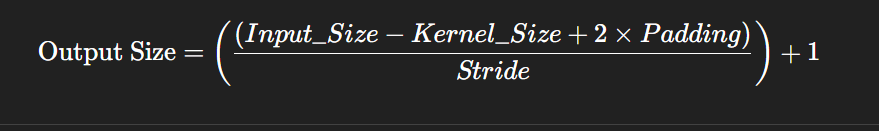

Explanation of Each Term

Input_Size → The width/height of the input image (e.g., 32 for a 32×32 image).

Kernel_Size → The size of the filter (e.g., 3 for a 3×3 kernel).

Padding → Extra pixels added around the image (0 = no padding).

Stride → Step size of the kernel when sliding over the input.

+1 → Ensures that even the first kernel placement is counted as one valid output.

✅ Example

Suppose:

Input = 5 × 5

Kernel = 3 × 3

Padding = 0 (valid padding)

Stride = 1

So, the output feature map will be 3 × 3.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

def conv2d(inp, kernel, stride=1, padding=0):
    if padding > 0:
        inp_p = np.pad(inp, ((padding,padding),(padding,padding)), mode='constant', constant_values=0)
    else:
        inp_p = inp.copy()
    kH, kW = kernel.shape
    out_h = (inp_p.shape[0] - kH) // stride + 1
    out_w = (inp_p.shape[1] - kW) // stride + 1
    out = np.zeros((out_h, out_w), dtype=int)
    for i in range(out_h):
        for j in range(out_w):
            patch = inp_p[i*stride : i*stride + kH, j*stride : j*stride + kW]
            out[i, j] = int(np.sum(patch * kernel))
    return out

def max_pool2d(inp, pool_size=2, stride=2):
    out_h = (inp.shape[0] - pool_size) // stride + 1
    out_w = (inp.shape[1] - pool_size) // stride + 1
    out = np.zeros((out_h, out_w), dtype=inp.dtype)
    for i in range(out_h):
        for j in range(out_w):
            patch = inp[i*stride : i*stride + pool_size, j*stride : j*stride + pool_size]
            out[i, j] = patch.max()
    return out

def flatten(mat):
    return mat.reshape(-1, order='C')

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

# Example input
image = np.array([
    [3, 0, 1, 2, 7, 4, 0, 1],
    [1, 5, 8, 9, 3, 1, 2, 3],
    [2, 7, 2, 5, 1, 3, 0, 2],
    [4, 6, 5, 9, 2, 7, 3, 1],
    [3, 1, 2, 6, 8, 0, 1, 4],
    [1, 2, 3, 4, 5, 6, 7, 8],
    [8, 7, 6, 5, 4, 3, 2, 1],
    [1, 0, 2, 3, 4, 5, 6, 7]
], dtype=int)

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=int)



In [12]:
print("Input image:\n", image)
print("\nKernel:\n", kernel)

Input image:
 [[3 0 1 2 7 4 0 1]
 [1 5 8 9 3 1 2 3]
 [2 7 2 5 1 3 0 2]
 [4 6 5 9 2 7 3 1]
 [3 1 2 6 8 0 1 4]
 [1 2 3 4 5 6 7 8]
 [8 7 6 5 4 3 2 1]
 [1 0 2 3 4 5 6 7]]

Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


## Diagram

The notebook also contains a small diagram illustrating the flow: Input → Conv → Pool → Flatten → FC.

In [13]:
conv_s1 = conv2d(image, kernel, stride=1, padding=0)
print("\nConvolution (stride=1, padding=0) output:\n", conv_s1)



Convolution (stride=1, padding=0) output:
 [[ -5  -4   0   8   9   2]
 [ -8  -5   9  12   1   5]
 [  0  -6  -2  10   7   3]
 [ -2 -10  -5   6   4   0]
 [  1  -5  -6   6   7  -4]
 [ -1  -3  -2  -2  -2  -2]]


In [14]:
conv_s2 = conv2d(image, kernel, stride=2, padding=0)
print("\nConvolution (stride=2, padding=0) output:\n", conv_s2)


Convolution (stride=2, padding=0) output:
 [[-5  0  9]
 [ 0 -2  7]
 [ 1 -6  7]]


In [15]:
conv_pad1 = conv2d(image, kernel, stride=1, padding=1)
print("\nConvolution (stride=1, padding=1) output:\n", conv_pad1)



Convolution (stride=1, padding=1) output:
 [[ -5  -5  -6  -1   6   8   1   2]
 [-12  -5  -4   0   8   9   2   2]
 [-18  -8  -5   9  12   1   5   5]
 [-14   0  -6  -2  10   7   3   4]
 [ -9  -2 -10  -5   6   4   0  11]
 [-10   1  -5  -6   6   7  -4  10]
 [ -9  -1  -3  -2  -2  -2  -2  15]
 [ -7   1  -1   0   0   0   0   8]]


In [16]:
pool = max_pool2d(conv_s1, pool_size=2, stride=2)
print("\nMax pooling (2x2) on conv_s1 output:\n", pool)




Max pooling (2x2) on conv_s1 output:
 [[-4 12  9]
 [ 0 10  7]
 [ 1  6  7]]


In [17]:
flat = flatten(pool)
print("\nFlattened vector:\n", flat)


Flattened vector:
 [-4 12  9  0 10  7  1  6  7]


In [18]:
# Tiny FC example
num_outputs = 6
W = np.arange(1, num_outputs * flat.size + 1).reshape(num_outputs, flat.size)
b = np.arange(1, num_outputs + 1)
fc = W.dot(flat) + b
print("\nFully connected (pre-softmax):\n", fc)


Fully connected (pre-softmax):
 [ 258  691 1124 1557 1990 2423]
